### ASTR 8070: Astrostatistics
***N. Pol***
___

# Homework 9
### Due: Friday, Apr 18th at 11.59pm CDT
---

The first homework problem this week is very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

## Problem 1


Go to the TensorFlow playground [here](https://playground.tensorflow.org/#activation=linear&regularization=L2&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=35&networkShape=1&seed=0.50246&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false). You will play with the tensorflow neural network architecture there, and come back to answer the questions here.


1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.


2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*


3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?


4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?


5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

1.) Using what we learned in lecture 21, $o_k = \sum^M_{j=1} (\sum^N_{i=1} w_{ik}w_{ij} + w_{jk}b_j) + b_k$ represents the equation for any number of neurons. Essentially, this boils down to the sum of the weighted sum of in inputs with a bias: 
$o = w_1x_1 + w_2x_2 + b$

Because this output is linear, it can not learn any nonlinearities.

2.) Logic would tell me that by changing FROM the "linear" activation to a non linear one, that it should be able to learn nonlinearities. Now, its not particularly great at it, but it seems alot less flat than the linear one.

3.) In all but the spiral dataset, this seems to work pretty effectively. It also seems fairly consistent.

4.) It seems that I need atleast 3 neurons in the hidden layer (1 hidden layer) to effectively and reliably get to a test loss of 0.177 or lower. Two neurons can not quite reach it, and adding another hidden layer seems to require even more.

5.) It seems a bit more inconsistent. It will struggle for a bit, and then jump to a fit. But, this fit is often a bit outside the parameter of a test loss of 0.177. Not usually by much, but enough to give a decent amount of variance to the results.

## Problem 2

The first few steps of this problem are the same as last week's homework.


1. Read in the same galaxy color data as used in Homework 8. Slice the data array to only take every other 10th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

In [91]:
#1

import numpy as np

data = np.load("hw_data\hw8_data_1.npy") #Importing the dataset

reduced = data[::10] #this should take every 10th row

ug   = reduced['u'] - reduced['g']
gr   = reduced['g'] - reduced['r']
ri   = reduced['r'] - reduced['i']
iz   = reduced['i'] - reduced['z']
z    = reduced['redshift']
spec = reduced['specClass']

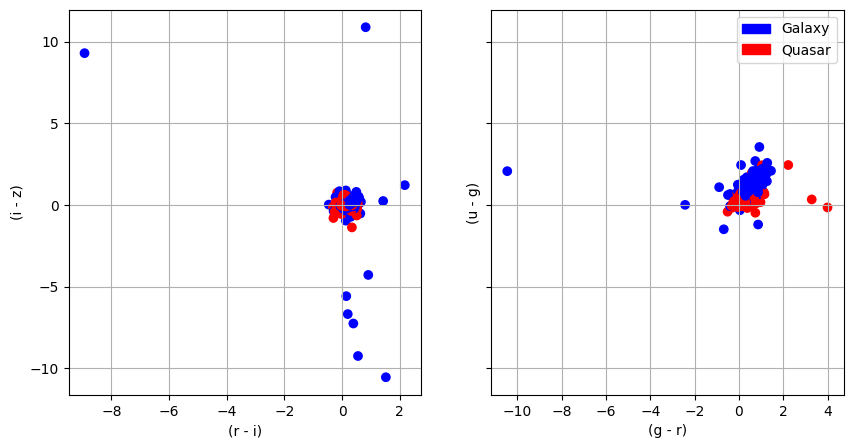

In [92]:
#2

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

map = {'GALAXY': 'blue', 'QSO': 'red'}
color = [map[x] for x in spec] #mapping the two tags to specific colors

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

ax1.scatter(ri,iz, c=color)
ax1.set_xlabel('(r - i)')
ax1.set_ylabel('(i - z)')
ax1.grid(True)

ax2.scatter(gr, ug, c=color)
ax2.set_xlabel('(g - r)')
ax2.set_ylabel('(u - g)')
ax2.grid(True)

legend_handles = [
    mpatches.Patch(color='blue', label='Galaxy'),
    mpatches.Patch(color='red', label='Quasar')
]

plt.legend(handles=legend_handles)

In [93]:
#3

from sklearn import model_selection as ms

map = {'GALAXY': 0, 'QSO': 1}
label = [map[x] for x in spec] #mapping the labels to integers for math
X = np.stack((ri, iz)).T

X_train, X_test, y_train, y_test = ms.train_test_split(X, label, test_size = 0.2, random_state=42) #training, 20% to test

In [94]:
#4

from sklearn.preprocessing import StandardScaler

X_trainS = StandardScaler().fit_transform(X_train) #not sure if this is all you wanted, it seems a bit short for a whole unique step
X_testS  = StandardScaler().fit_transform(X_test)

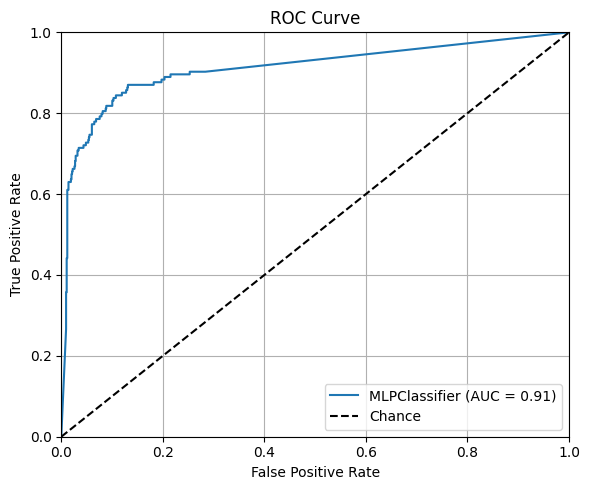

In [95]:
#5

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc

clf = MLPClassifier( #giving our conditions for the CLF
    hidden_layer_sizes=(5, 2),
    activation='relu',
    solver='sgd',
    max_iter=1000,
    random_state=42
)
clf.fit(X_trainS, y_train)

y_scores = clf.predict_proba(X_testS)[:, 1] #making our predictive scores

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"MLPClassifier (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
#6

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

parameters = {'solver': ['lbfgs', 'sgd', 'adam'], #given parameters
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}

mlp = MLPClassifier()

grid_search = GridSearchCV(mlp, parameters, n_jobs=-1, verbose=1) #grid search, using all cores
grid_search.fit(X_trainS, y_train)

best_mlp = grid_search.best_estimator_ #best estimate

train_score = best_mlp.score(X_trainS, y_train) #overall training accuracy

print("\nBest Parameters Found:")
print(grid_search.best_params_)
print(f"\nTraining Classification Score: {train_score:.4f}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Best Parameters Found:
{'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'adam'}

Training Classification Score: 0.9353


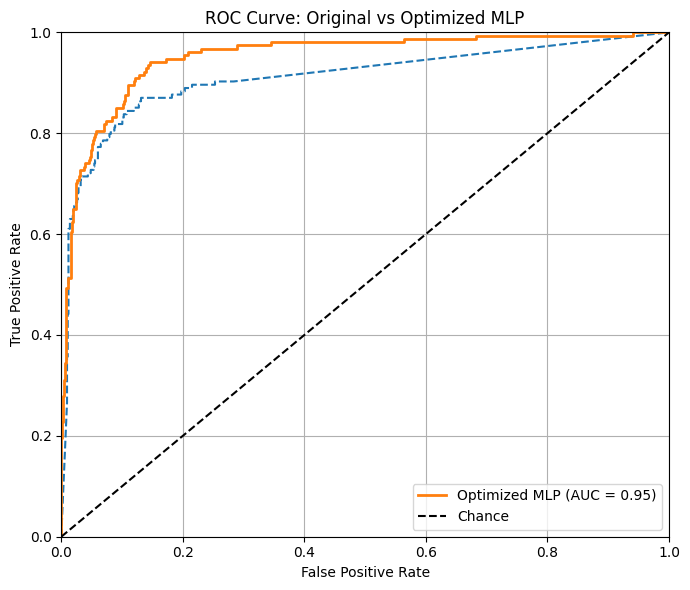

In [97]:
#7

best_clf = MLPClassifier(**grid_search.best_params_) #defining best CLF from previous parameters
best_clf.fit(X_trainS, y_train)
y_scores_best = best_clf.predict_proba(X_testS)[:, 1] #predicting our new comaprative scores
fpr_best, tpr_best, _ = roc_curve(y_test, y_scores_best)
auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, linestyle='--')
plt.plot(fpr_best, tpr_best, label=f"Optimized MLP (AUC = {auc_best:.2f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Original vs Optimized MLP")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

<span style="color:green">NP: Correct! good job!</span>